In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
%matplotlib inline

In [2]:
def truth_model(X, theta):
    y_truth = np.dot(X,theta)
    return y_truth

In [3]:
def gaussian_noise(mean, sigma, size):
    noise = scipy.stats.norm.rvs(mean, sigma, size)
    return noise

In [4]:
def generate_y_points(X, theta, noise=False, noise_mean=0.0, noise_sigma=0.1):
    t = truth_model(X,theta)
    if noise:
        n = gaussian_noise(noise_mean, noise_sigma, size=len(t))
        y = t + n
    else:
        y = t
    return y

In [5]:
def hypothesis(X, theta):
    h = generate_y_points(X, theta, noise=False)
    return h

In [6]:
def create_design_matrix_poly(x, npol):
    nsamples = len(x)
    nfeatures = npol+1
    xvec = np.array(x)
    X = np.zeros((nsamples, nfeatures))
    X[:,0] = 1
    X[:,1] = xvec.T
    for col in range(2,nfeatures):
        X[:,col] = xvec**col 
    return X

In [7]:
def calc_theta_opt_via_norm_eq(X, y, lam):
    nsamples, nfeatures = np.shape(X)
    L = np.identity(nfeatures)*lam
    L[0,0] = 0
    theta = np.dot(np.dot( np.linalg.inv(np.dot(X.T,X) + L), X.T), y)
    return theta

In [8]:
def calc_cost(X, theta, y_truth, lam):
    h = hypothesis(X, theta)
    D = h - y_truth
    cost = 0.5*np.dot(D.T,D) + lam*np.dot(theta.T,theta)
    return cost

In [9]:
def calc_h(X, y, lam):
    theta_best = calc_theta_opt_via_norm_eq(X, y, lam)
    h = hypothesis(X,theta_best)
    return h

In [10]:
def generate_best_fit_model_ensemble(X, y_true, lam, ntrials):
    y_ensemble = np.array([generate_y_points(X, theta_0, noise=True) for i in range(ntrials)])
    h_ensemble = np.array([calc_h(X, y, lam) for y in y_ensemble])
    theta_opt_ensemble = np.array([calc_theta_opt_via_norm_eq(X,y,lam) for y in y_ensemble])
    cost_ensemble = np.array([calc_cost(X, theta, y_true, lam) for theta in theta_opt_ensemble])
    return y_ensemble, theta_opt_ensemble, h_ensemble, cost_ensemble

## Truth model

Create features

In [11]:
x = np.linspace(0.0, 2.0, 10)

In [12]:
x

array([ 0.        ,  0.22222222,  0.44444444,  0.66666667,  0.88888889,
        1.11111111,  1.33333333,  1.55555556,  1.77777778,  2.        ])

In [13]:
X = create_design_matrix_poly(x, npol=3)

Truth parameters

In [14]:
theta_0 = [0.0, 1.0, 0.0, 0.0]

Truth y values

In [15]:
y_truth  = generate_y_points(X, theta_0, noise=False)

Generate ensemble of observed y values

In [16]:
nsamples = 100
y_ensemble = [generate_y_points(X, theta_0, noise=True) for i in range(nsamples)]

Calculate the best fit models to these

In [17]:
h_ensemble = [calc_h(X, y_sample, lam=0.0) for y_sample in y_ensemble]

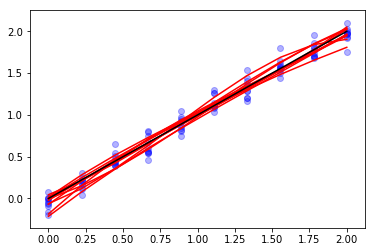

In [18]:
f,a = plt.subplots()
for h,y in list(zip(h_ensemble,y_ensemble))[:10]:
    a.scatter(x, y, c='b', label='sample', alpha=0.3)
    a.plot(x, h, c='r', label='predicted')
a.plot(x, y_truth, c='k', label='truth')
#plt.legend()

In [31]:
lambdas = [0.0, 0.1, 1.0, 2.0]

In [32]:
results = {}

In [33]:
for lam in lambdas:
    results[lam] = {}
    y, t, h, c = generate_best_fit_model_ensemble(X, y_truth, lam=lam, ntrials=1000)
    results[lam]['y'] = y
    results[lam]['t'] = t
    results[lam]['h'] = h
    results[lam]['c'] = c

In [45]:
def comparison_plot(results, comparison_type, index=None, bins=50):
    f,a = plt.subplots()
    for lam, r in results.items():
        if index is None:
            values = r[comparison_type]
        else:
            values = r[comparison_type][:,index]
        label = r"$\lambda$ = {}".format(lam)
        a.hist(values, bins=bins, label=label)
    plt.legend()
    return f,a

(<matplotlib.figure.Figure at 0x7fb18d20b4a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb18d1ddb70>)

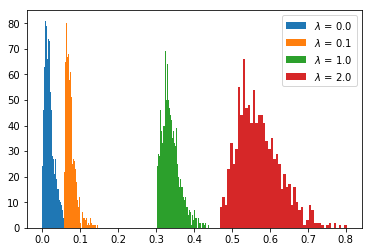

In [46]:
comparison_plot(results, 'c')

(<matplotlib.figure.Figure at 0x7fb18ca81080>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb18ce18cf8>)

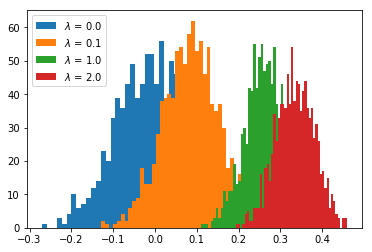

In [47]:
comparison_plot(results, 't', 0)

(<matplotlib.figure.Figure at 0x7fb18ca04438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb18c617cc0>)

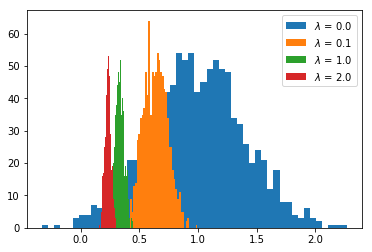

In [48]:
comparison_plot(results, 't', 1)

In [49]:
lam = 0.0

In [50]:
def show_pts(results, lam, ntrials):
    f,a = plt.subplots()
    for h,y in list(zip(results[lam]['h'], zip(results[lam]['y'])))[:ntrials]:
        a.plot(x, h, c='r', label='predicted')
        a.scatter(x,y, c='b', alpha=0.3)
    a.plot(x, y_truth, c='k', label='truth')
    return f,a

(<matplotlib.figure.Figure at 0x7fb18eec5b70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb18eea5c50>)

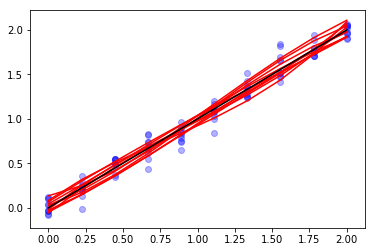

In [28]:
show_pts(results, lam=0.0, ntrials=10)

(<matplotlib.figure.Figure at 0x7fb18dff6940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb18dfd3ba8>)

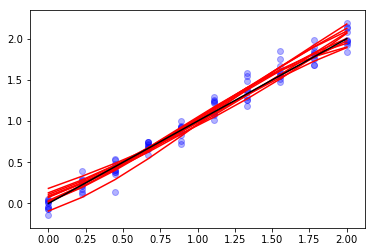

In [40]:
show_pts(results, lam=0.1, ntrials=10)

(<matplotlib.figure.Figure at 0x7fb18f7d5320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb18eebdf60>)

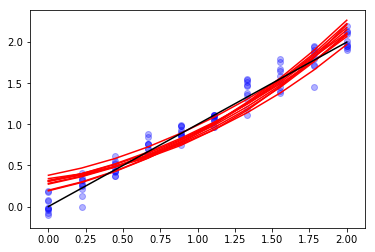

In [29]:
show_pts(results, lam=1.0, ntrials=10)

(<matplotlib.figure.Figure at 0x7fb18ec9fd30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb18eaaa5f8>)

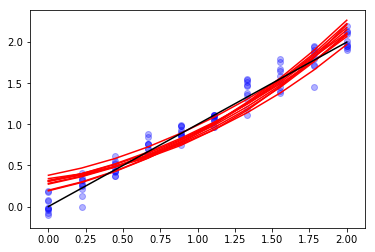

In [30]:
show_pts(results, lam=1.0, ntrials=10)